In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

sys.path.insert(0, '../src')
from linear_regression import LinearRegression
from plotters import plot_loss, plot_image

np.random.seed(43)

In [3]:
def train_model(x, y, model, n_iters, batch_size):
    
    loss = []

    for i in tqdm(range(n_iters)):
        batch_idx = np.random.randint(0, x.shape[0], size=batch_size)

        batch_x = x[batch_idx]
        batch_y = y[batch_idx]

        L = model.train(batch_x, batch_y)

        loss.append(L)
    return loss

In [4]:
size = 800

k = 3
b = 1
eps = np.random.uniform(low=-2, high=2, size = size)

x = np.random.normal(size=size)
y = x * k + b + eps

In [5]:
x_train, x_test, y_train, y_test, eps_train, eps_test = train_test_split(x, y, eps)

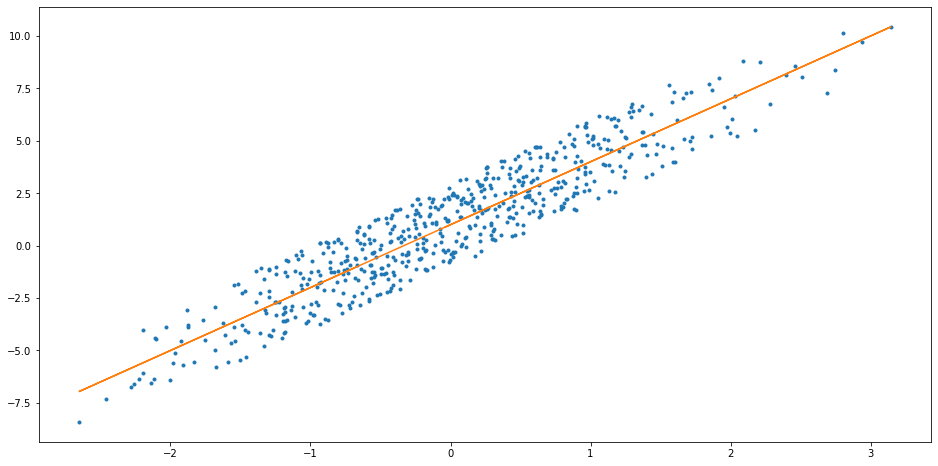

In [6]:
fig, axes = plt.subplots(figsize=(16,8))
axes.plot(x_train, y_train, '.')
axes.plot(x_train, y_train - eps_train)

In [7]:
model = LinearRegression(1, lr=1e-4)
loss = train_model(x_train.reshape(-1, 1), y_train, model, 1000, 32)

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\Vanek\Documents\Python_scripts\Linear_regression\plotters.py:456: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


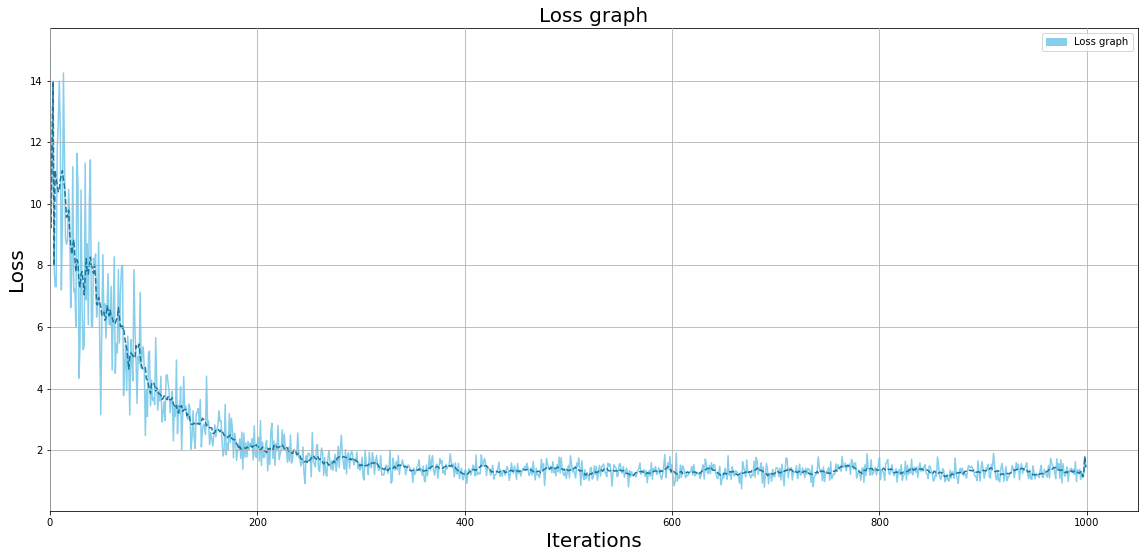

In [8]:
plot_loss(np.array(loss), figsize=(16,8), final_mean=None)

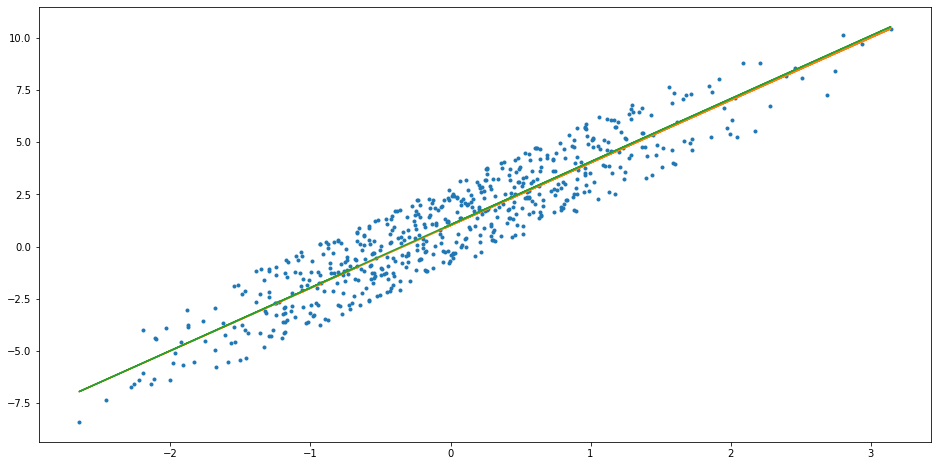

In [9]:
fig, axes = plt.subplots(figsize=(16,8))
axes.plot(x_train, y_train, '.')
axes.plot(x_train, y_train - eps_train)
axes.plot(x_train, model.forward(x_train[:, None]).T[:])

In [10]:
model.evaluate(x_test[:, None], y_test)

array(1.36008516)

In [11]:
model.loss(y_test, y_test-eps_test)

1.3578886077702537